In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_data_general = pd.read_csv('../../data/data_general.csv')

In [3]:
columns_selected = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
df_data_general = df_data_general[df_data_general['Cluster'] == 0]
df_data_selected = df_data_general[columns_selected]

# Linear Regression

In [4]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_data_selected)
df_data_selected['PCA1'] = components[:, 0]
df_data_selected['PCA2'] = components[:, 1]

C:\Users\ismer\AppData\Local\Temp\ipykernel_25724\3727481083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_selected['PCA1'] = components[:, 0]
C:\Users\ismer\AppData\Local\Temp\ipykernel_25724\3727481083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_selected['PCA2'] = components[:, 1]


In [5]:
X = df_data_selected[['PCA1']].values
y = df_data_selected['PCA2'].values

In [6]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    SGDRegressor(max_iter=1000, tol=1e-3, penalty=None)  # sin regularización L2/L1
)
model.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('sgdregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,loss,'squared_error'
,penalty,None
,alpha,0.0001


In [7]:
y_hat = model.predict(X)

In [8]:
print("R2 Score:", r2_score(y, y_hat))

R2 Score: 0.00421489405240838


Text(0.5, 1.0, 'Polynomial Regression Cluster 0. R2 0.004')

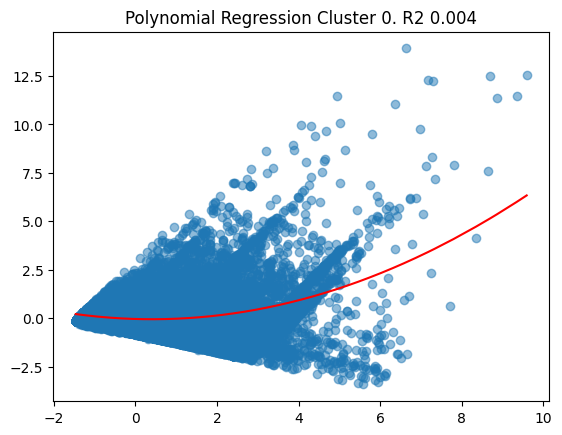

In [11]:
import numpy as np

# Ordenar según X
sort_idx = np.argsort(X.flatten())
X_sorted = X.flatten()[sort_idx]
y_hat_sorted = y_hat.flatten()[sort_idx]

plt.scatter(df_data_selected['PCA1'], y, alpha=0.5)
plt.plot(X_sorted, y_hat_sorted, color='red')
plt.title(f"Polynomial Regression Cluster 0. R2 {r2_score(y, y_hat):.3f}")

In [10]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 26 Aug 2025   Prob (F-statistic):               1.00
Time:                        13:01:42   Log-Likelihood:            -1.0295e+05
No. Observations:              112380   AIC:                         2.059e+05
Df Residuals:                  112378   BIC:                         2.059e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.607e-17      0.002  -8.91e-15      1.0